In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

from analysis_utils import get_df

In [2]:
identifier = '*'
df = get_df(identifier)
print('before filtering, there are a total of', len(df), 'models')

/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)


before filtering, there are a total of 281 models


In [3]:
df.dtypes


input_size                                              object
output_size                                             object
batch_norm                                              object
use_pooling                                             object
pooling_method                                          object
conv1_kernel_size                                        int64
conv1_num_kernels                                        int64
conv1_stride                                             int64
conv1_dropout                                          float64
pool1_kernel_size                                        int64
pool1_stride                                             int64
conv2_kernel_size                                        int64
conv2_num_kernels                                        int64
conv2_stride                                             int64
conv2_dropout                                          float64
pool2_kernel_size                                      

# Filter by improvement across 3 scan batteries

In [4]:
snr_max_tolerance = 1.0
df_consistent_cnr_snr = df.query('target_anechoic_cyst_5mm_avg_cnr_dnn >= target_anechoic_cyst_5mm_avg_cnr_das & \
               target_phantom_anechoic_cyst_2p5mm_avg_cnr_dnn >= target_phantom_anechoic_cyst_2p5mm_avg_cnr_das & \
               target_in_vivo_avg_cnr_dnn >= target_in_vivo_avg_cnr_das & \
               target_anechoic_cyst_5mm_avg_snr_dnn <= target_anechoic_cyst_5mm_avg_snr_das + ' + str(snr_max_tolerance) + ' & \
               target_phantom_anechoic_cyst_2p5mm_avg_snr_dnn <= target_phantom_anechoic_cyst_2p5mm_avg_snr_das + ' + str(snr_max_tolerance) + ' & \
               target_in_vivo_avg_snr_dnn <= target_in_vivo_avg_snr_das + ' + str(snr_max_tolerance))

# Label rows with consistent or not

In [5]:
df.loc[df.index.isin(df_consistent_cnr_snr.index), 'consistent'] = True
df.loc[~df.index.isin(df_consistent_cnr_snr.index), 'consistent'] = False

In [6]:
# Hyperparameters to look at

hyperparams = [ \
#  'name',
 'batch_norm',
 'use_pooling',
 'conv1_kernel_size',
 'conv1_num_kernels',
 'conv1_stride',
#  'conv1_dropout',
               
 'pool1_kernel_size',
 'pool1_stride',
               
 'conv2_kernel_size',
 'conv2_num_kernels',
 'conv2_stride',
 'conv2_dropout',
               
 'pool2_kernel_size',
 'pool2_stride',
               
 'fcs_hidden_size',
 'fcs_dropout',
 'fcs_num_hidden_layers',
               
               
#  'data_is_target',
 'data_noise_gaussian',
#  'data_train',
#  'data_val',
#  'k',
#  'patience',
#  'save_initial',
#  'weight_decay',
#  'batch_size',
#  'loss_val_k_3',
 'loss_val_k_4',
#  'loss_val_k_5',
          
 'learning_rate',
 'optimizer',
#  'momentum',
]



# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))


# Older models don't have use_pooling or batch_norm

In [29]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

df[df['use_pooling'] != 1]

,input_size,output_size,batch_norm,use_pooling,pooling_method,conv1_kernel_size,conv1_num_kernels,conv1_stride,conv1_dropout,pool1_kernel_size,pool1_stride,conv2_kernel_size,conv2_num_kernels,conv2_stride,conv2_dropout,pool2_kernel_size,pool2_stride,fcs_hidden_size,fcs_num_hidden_layers,fcs_dropout,cost_function,optimizer,learning_rate,data_is_target,data_train,data_val,batch_size,data_noise_gaussian,weight_decay,patience,cuda,save_initial,k,save_dir,name,loss_val_k_3,loss_val_k_4,loss_val_k_5,target_in_vivo_target_17_cnr_das,target_in_vivo_target_17_cnr_dnn,target_in_vivo_target_17_snr_das,target_in_vivo_target_17_snr_dnn,target_in_vivo_target_19_cnr_das,target_in_vivo_target_19_cnr_dnn,target_in_vivo_target_19_snr_das,target_in_vivo_target_19_snr_dnn,target_in_vivo_avg_cnr_das,target_in_vivo_avg_cnr_dnn,target_in_vivo_avg_snr_das,target_in_vivo_avg_snr_dnn,target_anechoic_cyst_5mm_target_5_SNR_10dB_cnr_das,target_anechoic_cyst_5mm_target_5_SNR_10dB_cnr_dnn,target_anechoic_cyst_5mm_target_5_SNR_10dB_snr_das,target_anechoic_cyst_5mm_target_5_SNR_10dB_snr_dnn,target_anechoic_cyst_5mm_target_4_SNR_10dB_cnr_das,target_anechoic_cyst_5mm_target_4_SNR_10dB_cnr_dnn,target_anechoic_cyst_5mm_target_4_SNR_10dB_snr_das,target_anechoic_cyst_5mm_target_4_SNR_10dB_snr_dnn,target_anechoic_cyst_5mm_target_2_SNR_10dB_cnr_das,target_anechoic_cyst_5mm_target_2_SNR_10dB_cnr_dnn,target_anechoic_cyst_5mm_target_2_SNR_10dB_snr_das,target_anechoic_cyst_5mm_target_2_SNR_10dB_snr_dnn,target_anechoic_cyst_5mm_target_3_SNR_10dB_cnr_das,target_anechoic_cyst_5mm_target_3_SNR_10dB_cnr_dnn,target_anechoic_cyst_5mm_target_3_SNR_10dB_snr_das,target_anechoic_cyst_5mm_target_3_SNR_10dB_snr_dnn,target_anechoic_cyst_5mm_target_1_SNR_10dB_cnr_das,target_anechoic_cyst_5mm_target_1_SNR_10dB_cnr_dnn,target_anechoic_cyst_5mm_target_1_SNR_10dB_snr_das,target_anechoic_cyst_5mm_target_1_SNR_10dB_snr_dnn,target_anechoic_cyst_5mm_avg_cnr_das,target_anechoic_cyst_5mm_avg_cnr_dnn,target_anechoic_cyst_5mm_avg_snr_das,target_anechoic_cyst_5mm_avg_snr_dnn,target_phantom_anechoic_cyst_2p5mm_target_5_cnr_das,target_phantom_anechoic_cyst_2p5mm_target_5_cnr_dnn,target_phantom_anechoic_cyst_2p5mm_target_5_snr_das,target_phantom_anechoic_cyst_2p5mm_target_5_snr_dnn,target_phantom_anechoic_cyst_2p5mm_target_2_cnr_das,target_phantom_anechoic_cyst_2p5mm_target_2_cnr_dnn,target_phantom_anechoic_cyst_2p5mm_target_2_snr_das,target_phantom_anechoic_cyst_2p5mm_target_2_snr_dnn,target_phantom_anechoic_cyst_2p5mm_target_3_cnr_das,target_phantom_anechoic_cyst_2p5mm_target_3_cnr_dnn,target_phantom_anechoic_cyst_2p5mm_target_3_snr_das,target_phantom_anechoic_cyst_2p5mm_target_3_snr_dnn,target_phantom_anechoic_cyst_2p5mm_target_4_cnr_das,target_phantom_anechoic_cyst_2p5mm_target_4_cnr_dnn,target_phantom_anechoic_cyst_2p5mm_target_4_snr_das,target_phantom_anechoic_cyst_2p5mm_target_4_snr_dnn,target_phantom_anechoic_cyst_2p5mm_target_1_cnr_das,target_phantom_anechoic_cyst_2p5mm_target_1_cnr_dnn,target_phantom_anechoic_cyst_2p5mm_target_1_snr_das,target_phantom_anechoic_cyst_2p5mm_target_1_snr_dnn,target_phantom_anechoic_cyst_2p5mm_avg_cnr_das,target_phantom_anechoic_cyst_2p5mm_avg_cnr_dnn,target_phantom_anechoic_cyst_2p5mm_avg_snr_das,target_phantom_anechoic_cyst_2p5mm_avg_snr_dnn,consistent
0,65,130,1,0,max,26,29,1,0.0,2,2,5,12,1,0.702958,2,2,438,3,0.087571,MSE,SGD,1.575605e-03,0,/home/chenz28/Downloads/20180402_L74_70mm/trai...,/home/chenz28/Downloads/20180402_L74_70mm/val_...,32,0,0,20,1,0,4,DNNs/20180718164411_37_created/k_4,20180718164411_37_evaluated,0.022003,0.025377,0.027426,-14.982,-4.5130,1.8672,1.25540,4.2585,4.753100,1.9078,1.74260,-5.36175,0.120050,1.8875,1.499000,5.0831,4.980500,1.9186,1.80700,4.8877,4.639600,1.8922,1.74920,4.9138,4.69590,1.8777,1.75380,5.148,5.13180,1.9231,1.83920,5.09,4.781800,1.9281,1.78580,5.02452,4.845920,1.90794,1.787000,3.804,4.01800,1.8886,1.6554,3.7869,4.654500,1.8478,1.75170,4.5012,5.23420,1.9997,1.90960,4.7083,5.586500,2.0478,1.95540,4.3994,4.791000,1.9298,1.

# What percentage of consistent models use pooling?

In [30]:
# NOTE: older models may use_pooling hard-coded as 0
# NOTE: There might be older models that don't even have "use_pooling"
print('inconsistent', len(df[~df['consistent'] & df['use_pooling']]) / len(df[~df['consistent']]))
print('consistent', len(df[df['consistent'] & df['use_pooling']]) / len(df[df['consistent']]))

inconsistent 0.25853658536585367
consistent 0.2631578947368421


# What percentage of consistent vs inconsistent models use batch norm?

In [24]:
# NOTE: older models may have batch_norm set to 1
# NOTE: There might be older models that don't even have "batch_norm"
print('inconsistent', len(df[~df['consistent'] & df['batch_norm']]) / len(df[~df['consistent']]))
print('consistent', len(df[df['consistent'] & df['batch_norm']]) / len(df[df['consistent']]))

inconsistent 0.7365853658536585
consistent 0.7368421052631579


# What percentage of consistent vs inconsistent models use gaussian noise?

In [23]:
# NOTE: We've been using gaussian noise since the beginning
print('inconsistent', len(df[~df['consistent'] & df['data_noise_gaussian']]) / len(df[~df['consistent']]))
print('consistent', len(df[df['consistent'] & df['data_noise_gaussian']]) / len(df[df['consistent']]))

inconsistent 0.4926829268292683
consistent 0.6578947368421053


# Distribution of conv1_kernel_size among consistent vs inconsistent models

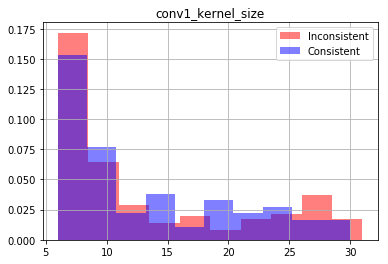

In [49]:
# Note: we didn't allow larger kernel sizes until later
fig, ax = plt.subplots(1, 1)
df[df['consistent'] != 1].hist(column='conv1_kernel_size', ax=ax, density=True, alpha=0.5, label='Inconsistent', color='red')
df[df['consistent'] == 1].hist(column='conv1_kernel_size', ax=ax, density=True, alpha=0.5, label='Consistent', color='blue')
ax.legend(loc='upper right')
plt.show()

### The plotting method

In [11]:
# NOTE: for each hyperparameter that is discrete, the y value (e.g. 'mean_cyst_cnr') 
# is the best given an x value (hyperparam, e.g. 'conv1_kernel_size'). However,
# for continuous values such as loss, there's no way of tallying the cnr given the
# same exact loss because there are no same exact losses.
def plot_merged_cnr_hyperparameters(df, y_column, hyperparams_of_interest, ylim=None):
    # TODO: 2. ylim
    # TODO: 3. resize x bar widths
    df.reset_index(inplace=True, drop=True)
    
    num_hyperparameters = len(hyperparams_of_interest)
    fig, axes = plt.subplots()

    for i, hyperparam in enumerate(hyperparams_of_interest):
        # for each unique value of "dropout", find the max for "mean_cnr_cyst"
        df_max = df.groupby(hyperparam).idxmax()
        df_max['type'] = 'max'

        df2 = df_max.set_index('type',append=True).stack().rename('index')

        df3 = pd.concat([ df2.reset_index().drop(hyperparam,axis=1).set_index('index'), 
                          df.loc[df2.values] ], axis=1 )
        df4 = df3.set_index([hyperparam,'level_2']).sort_index()[y_column]
        df5 = df4.loc[(df4.index.get_level_values('level_2') == y_column)].to_frame()
        df5 = df5.reset_index().drop('level_2', axis=1)
        
        plt.figure()
        # TODO: redo this for generalization
        if hyperparam.startswith('loss_val_k'):
#             plt.bar(df5[hyperparam], width, df5[y_column])
#             plt.hist(df5[hyperparam], histtype='bar', label=[str(x) for x in popup_values])
            plt.scatter(df5[hyperparam], df5[y_column])
        elif hyperparam in ['conv1_dropout', 'conv2_dropout', 'fcs_dropout']:
            width = 0.1
            plt.bar(df5[hyperparam], df5[y_column], width)
        else:
            plt.bar(df5[hyperparam], df5[y_column])
        plt.xlabel(hyperparam)
        plt.ylabel(y_column)
        if ylim: plt.ylim(*ylim)

# Simulation CNR as a Function of Hyperparameters

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


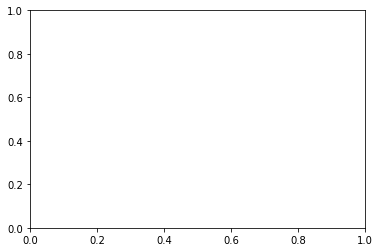

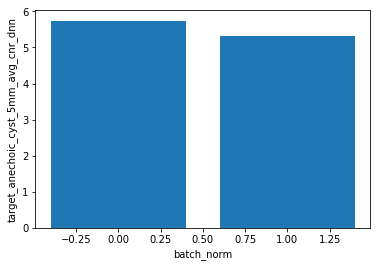

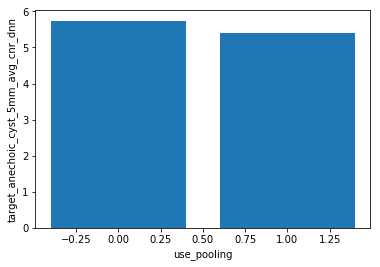

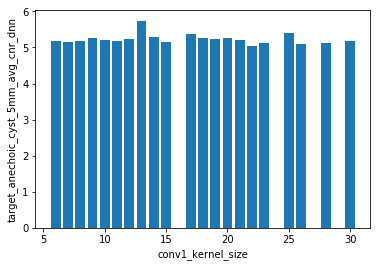

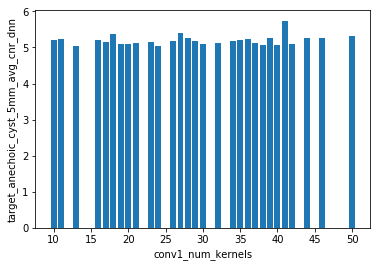

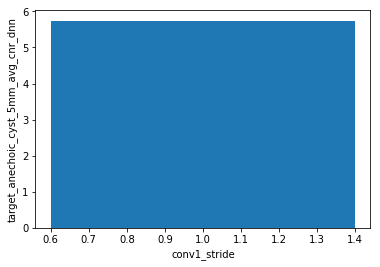

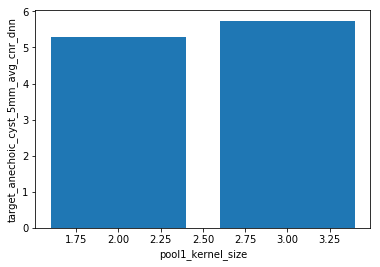

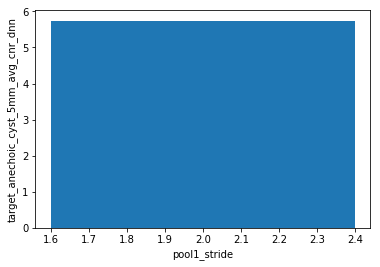

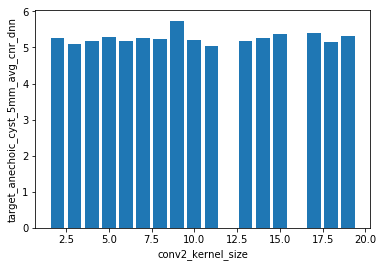

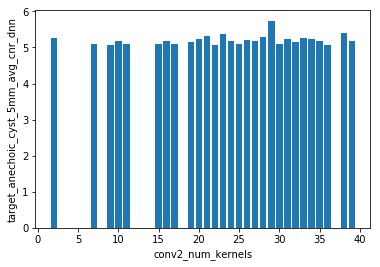

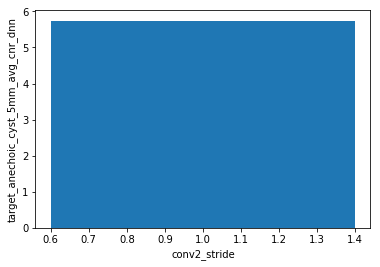

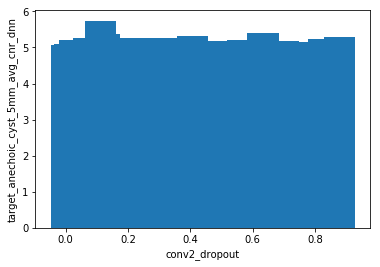

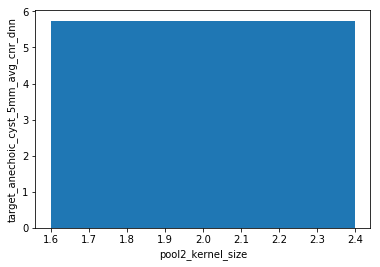

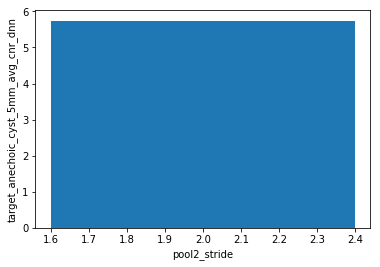

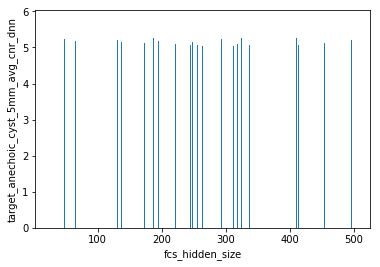

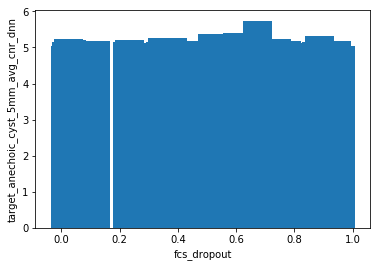

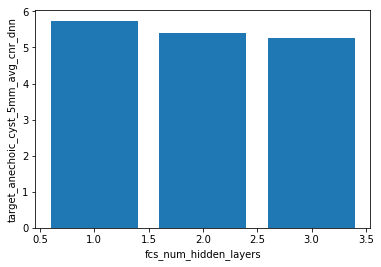

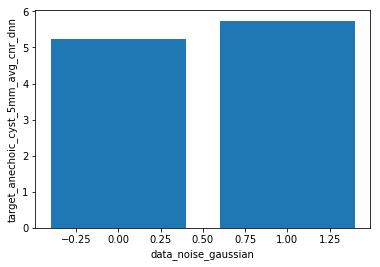

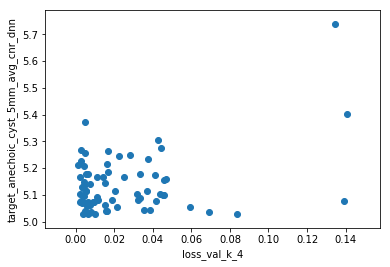

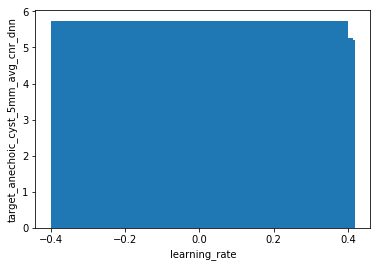

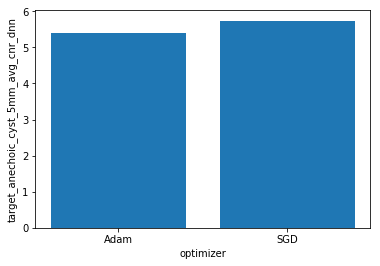

In [12]:
plot_merged_cnr_hyperparameters(df_consistent_cnr_snr, 'target_anechoic_cyst_5mm_avg_cnr_dnn', hyperparams, ylim=None)

# Phantom CNR as a Function of Hyperparameters

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


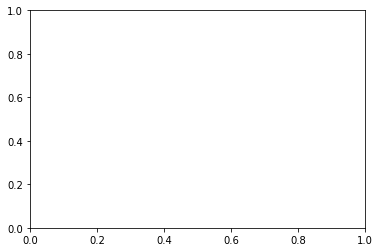

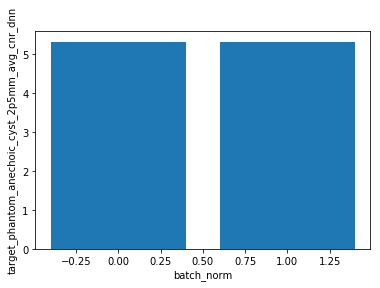

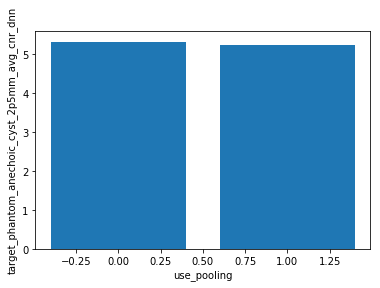

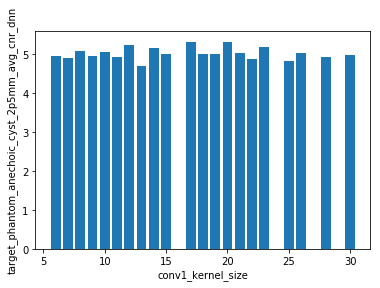

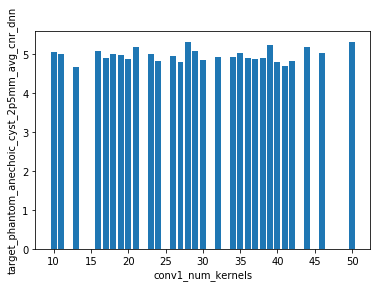

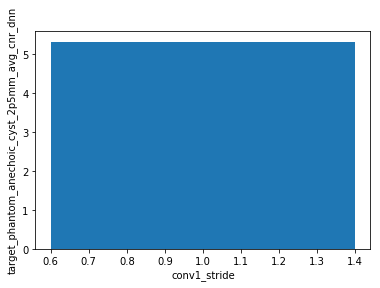

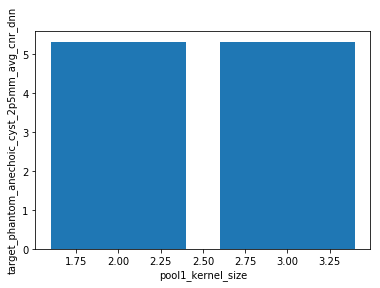

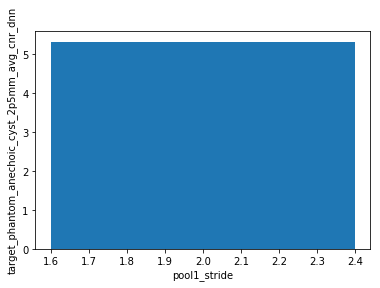

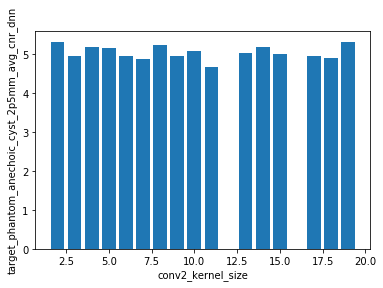

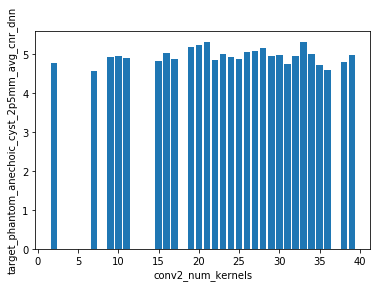

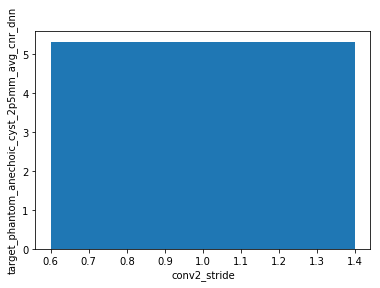

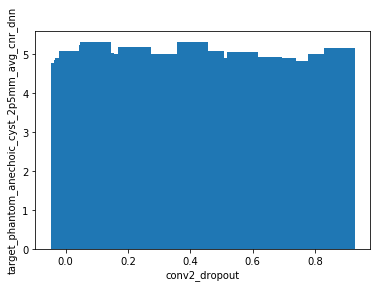

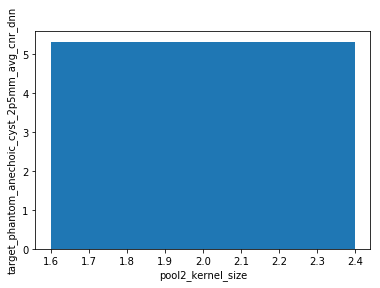

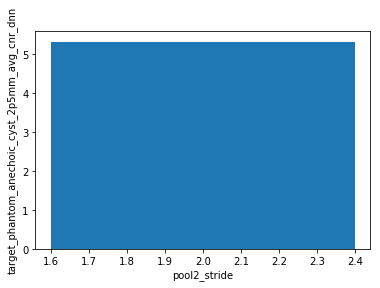

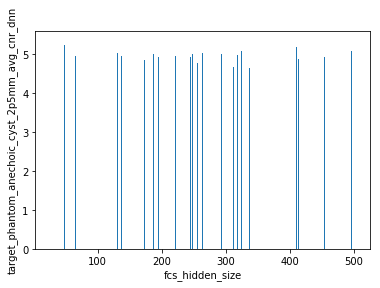

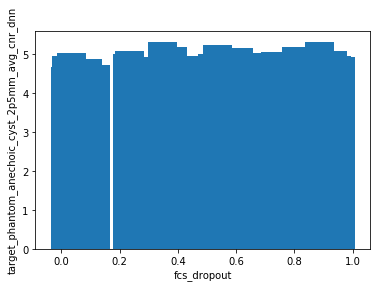

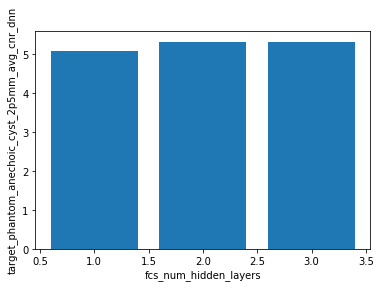

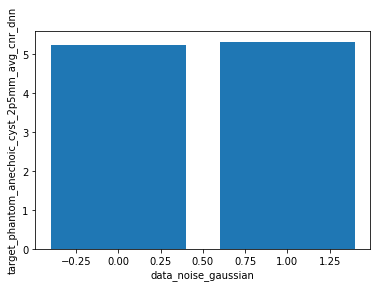

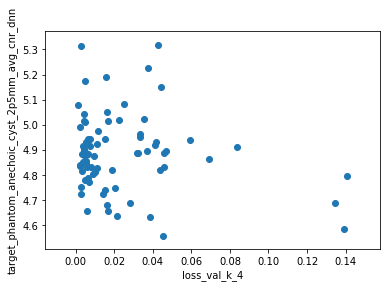

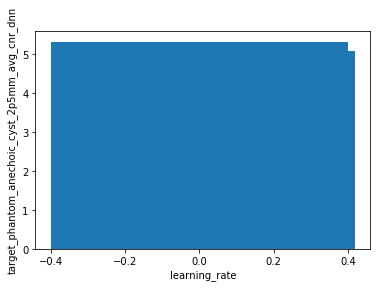

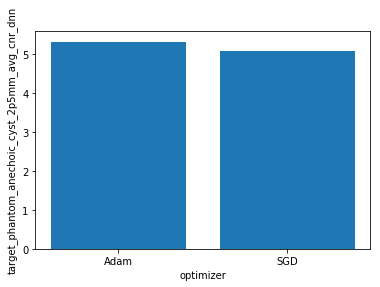

In [13]:
plot_merged_cnr_hyperparameters(df_consistent_cnr_snr, 'target_phantom_anechoic_cyst_2p5mm_avg_cnr_dnn', hyperparams, ylim=None)

# In Vivo CNR as a Function of Hyperparameters

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


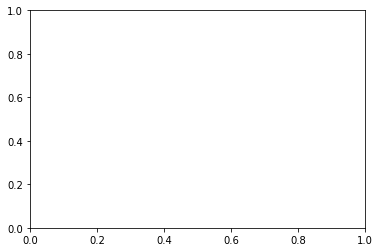

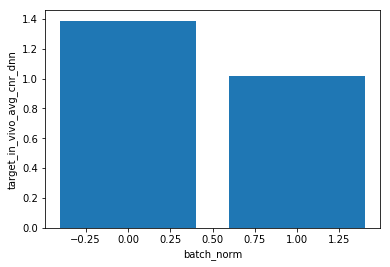

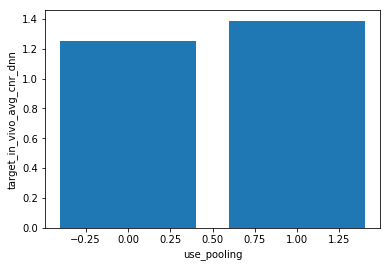

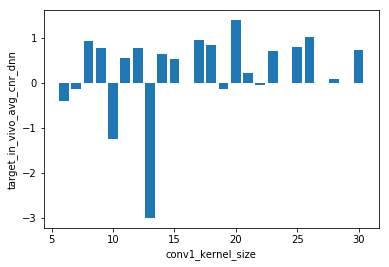

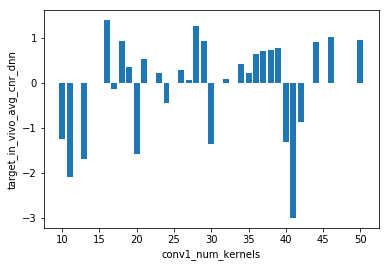

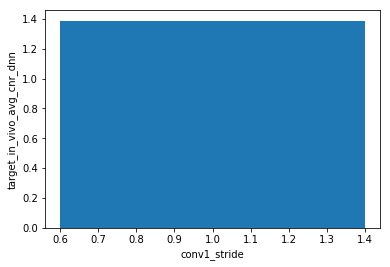

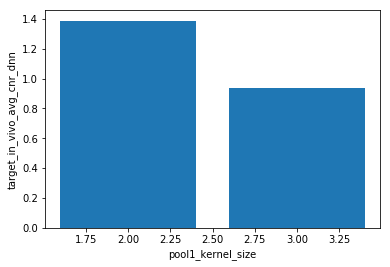

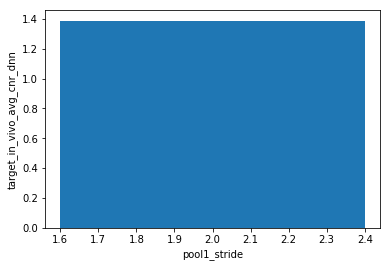

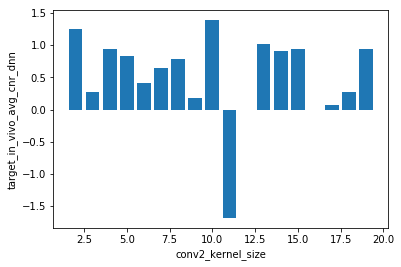

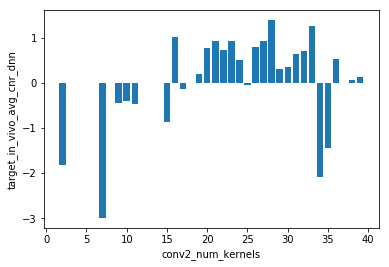

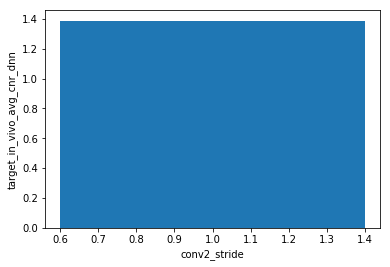

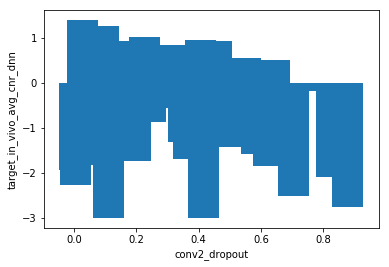

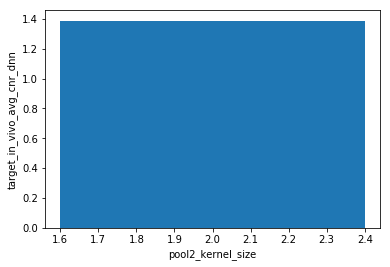

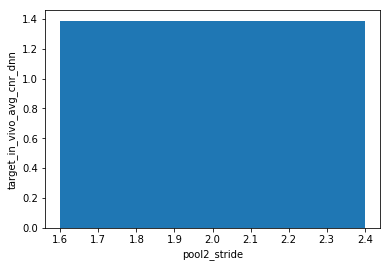

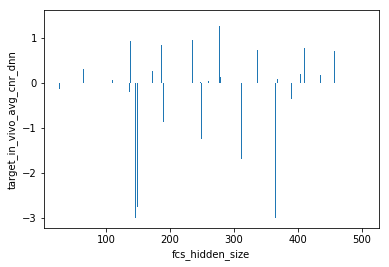

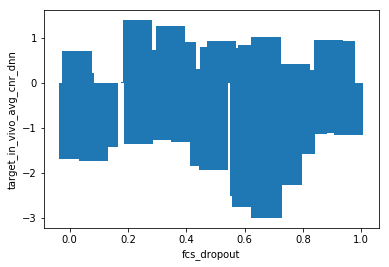

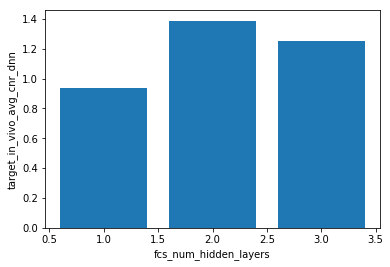

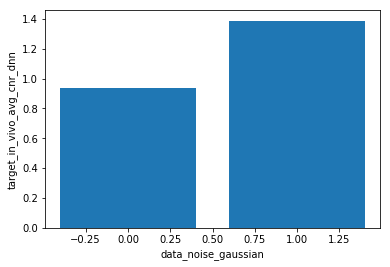

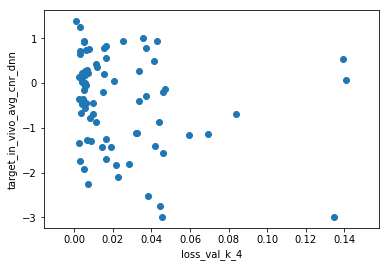

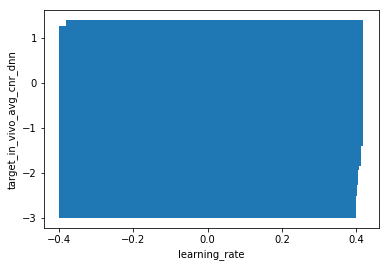

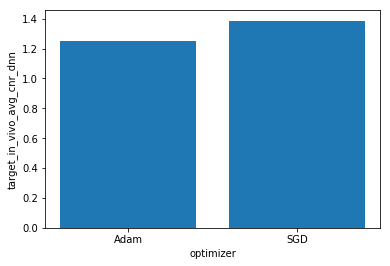

In [14]:
plot_merged_cnr_hyperparameters(df_consistent_cnr_snr, 'target_in_vivo_avg_cnr_dnn', hyperparams, ylim=None)